intro 

F1

plots -> 

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',50)
pd.options.display.max_rows

60

In [3]:
initFile = pd.read_csv('listings.csv',index_col= 'id',low_memory=False)
initFile.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02


In [4]:
lst = ['listing_url','scrape_id','last_scraped','summary',\
       'space','description','experiences_offered','neighborhood_overview','interaction','access','house_rules',\
       'notes','thumbnail_url','medium_url','picture_url','host_url',\
      'host_about','host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url',\
       'host_listings_count','host_has_profile_pic','host_verifications',\
       'neighbourhood','neighbourhood_group_cleansed','market','country_code',\
      'country','is_location_exact','square_feet','weekly_price','monthly_price','minimum_minimum_nights',\
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',\
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','calendar_last_scraped',\
      'availability_30','availability_60','availability_90','availability_365','number_of_reviews_ltm',\
       'requires_license','license','jurisdiction_names','is_business_travel_ready','require_guest_profile_picture',\
      'require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','xl_picture_url',\
      ]
initFile.drop(columns=lst,inplace=True)

In [5]:
initFile.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",Culver City,Culver City,CA,90230,"Culver City, CA",33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02
344,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,f,Burbank,1.0,t,"Burbank, CA, United States",Burbank,Burbank,CA,91505,"Burbank, CA",34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16
2708,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,t,Hollywood,2.0,t,"Los Angeles, CA, United States",Hollywood,Los Angeles,CA,90046,"Los Angeles, CA",34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32
2732,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",Santa Monica,Santa Monica,CA,90405,"Santa Monica, CA",34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18
2864,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",Bellflower,Bellflower,CA,90706,"Bellflower, CA",33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN


In [6]:
initFile.reset_index(inplace=True)

In [7]:
initFile['colid'] = initFile.index 

In [8]:
initFile.drop('id',axis=1,inplace=True)

In [9]:
initFile.rename(columns={'colid':'id'},inplace=True)
initFile.id +=1

In [10]:
initFile.set_index('id',inplace=True)
initFile.head(1)

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",Culver City,Culver City,CA,90230,"Culver City, CA",33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02


## Cleaning the dataset to make sure we have only CA related values

In [11]:
df = initFile.copy()

In [12]:
df.state.loc[df.state=='California'] = 'CA'
df.state.unique()
df.state = df['state'].str.upper()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df.state.value_counts()

CA    44611
NY        2
加州        2
IL        1
FL        1
加洲        1
Name: state, dtype: int64

## We need to remove the non-CA values from the dataset

In [14]:
df.drop(df[~(df.state.values=='CA')].index,axis=0,inplace=True)

In [15]:
df.columns

Index(['name', 'transit', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

In [16]:
df.city = df.city.str.lower()
df.city.unique()
df.city.dropna(inplace=True)

In [17]:
df['city'] = df['city'].str.replace(r'[^\x00-\x7F]+', '')
df.city.dropna(inplace=True)
df.city.value_counts()

los angeles                   27933
long beach                     1612
santa monica                   1059
west hollywood                  973
beverly hills                   767
                              ...  
los angeles                       1
toluca                            1
venice , los angeles              1
silver lake, los angeles          1
el segundo, california, us        1
Name: city, Length: 334, dtype: int64

In [18]:
df.groupby('city')['neighbourhood_cleansed'].value_counts()

city                         neighbourhood_cleansed   
                             Rowland Heights              5
                             Monterey Park                2
                             El Monte                     1
                             Hacienda Heights             1
                             Rosemead                     1
                                                         ..
woodland hills, los angeles  Woodland Hills               1
woodland hills/los angeles   Woodland Hills               1
woodland hls                 Woodland Hills               1
wrightwood                   Angeles Crest                2
                             Southeast Antelope Valley    1
Name: neighbourhood_cleansed, Length: 857, dtype: int64

In [19]:
df.smart_location.shape

(44611,)

In [20]:
df.smart_location = df.smart_location.str.lower()

In [21]:
df.smart_location.unique()

array(['culver city, ca', 'burbank, ca', 'los angeles, ca',
       'santa monica, ca', 'bellflower, ca', 'woodland hills, ca',
       'beverly hills, ca', 'venice, ca', 'long beach, ca',
       'redondo beach, ca', 'torrance, ca', 'n hollywood, ca',
       'studio city, ca', 'glendale, ca', 'malibu, ca',
       'san fernando valley, ca', 'lynwood, ca', 'hollywood, ca',
       'granada hills, (los angeles), ca', 'west hollywood, ca',
       'encino, ca', 'north hills, ca', 'carson, ca',
       'north hollywood, ca', 'altadena, ca', 'calabasas, ca',
       'hollywood hills, ca', 'agoura hills-malibu, ca',
       'manhattan beach, ca', 'sherman oaks, ca', 'topanga, ca',
       'rancho palos verdes, ca', 'san gabriel, ca', 'marina del rey, ca',
       'lakewood, ca', 'topanga canyon, ca', 'sierra madre, ca',
       'pasadena, ca', 'agua dulce, ca', 'hermosa beach, ca',
       'compton, ca', 'pacific palisades, ca', 'el segundo, ca',
       'los angeles county, ca', 'inglewood, ca', 'covina

In [22]:
df.isnull().sum()

name                               6
transit                        16942
host_id                            0
host_name                         14
host_since                        14
host_location                    136
host_response_time              7979
host_is_superhost                 14
host_neighbourhood              7679
host_total_listings_count         14
host_identity_verified            14
street                             0
neighbourhood_cleansed             0
city                              20
state                              0
zipcode                          541
smart_location                     0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         22
bedrooms                          18
beds                              63
bed_type                           0
amenities                          0
p

In [23]:
df.drop(df[(df['smart_location'] == '蒙特利帕克, ca') | \
                       (df['smart_location'] == '因達斯特里, ca') | \
                       (df['smart_location'] == '艾尔蒙地, ca') | \
                       (df['smart_location'] == '沃尔纳特, ca') | \
                       (df['smart_location'] == '哈仙达岗, ca') | \
                       (df['smart_location'] == '罗兰高地, ca') | \
                       (df['smart_location'] == '罗兰岗, ca') | \
                       (df['smart_location'] == '天普市, ca') | \
                       (df['smart_location'] == '洛杉矶, ca')  \
                      ].index, inplace = True)

In [24]:
df.smart_location = df.smart_location.str.replace(', ca',' ', regex=True)
df.smart_location = df.smart_location.str.strip()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.strip()

In [25]:
df['location'] = ''

In [26]:
df.smart_location = df.smart_location.str.lower()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.lower() 
df.location = df.location.str.lower()
df.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",culver city,culver city,CA,90230,culver city,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02,
2,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,f,Burbank,1.0,t,"Burbank, CA, United States",burbank,burbank,CA,91505,burbank,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16,
3,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,t,Hollywood,2.0,t,"Los Angeles, CA, United States",hollywood,los angeles,CA,90046,los angeles,34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32,
4,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",santa monica,santa monica,CA,90405,santa monica,34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18,
5,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",bellflower,bellflower,CA,90706,bellflower,33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,


In [27]:
 df.location =  df.neighbourhood_cleansed[df['neighbourhood_cleansed']== df['smart_location']]
 df.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",culver city,culver city,CA,90230,culver city,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02,culver city
2,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,f,Burbank,1.0,t,"Burbank, CA, United States",burbank,burbank,CA,91505,burbank,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16,burbank
3,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,t,Hollywood,2.0,t,"Los Angeles, CA, United States",hollywood,los angeles,CA,90046,los angeles,34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32,NaN
4,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",santa monica,santa monica,CA,90405,santa monica,34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18,santa monica
5,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",bellflower,bellflower,CA,90706,bellflower,33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,bellflower


In [28]:
df.location.isna().value_counts()

True     30817
False    13782
Name: location, dtype: int64

In [29]:
df.location.fillna(df.neighbourhood_cleansed+','+df.smart_location,inplace=True)
df.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,location
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",culver city,culver city,CA,90230,culver city,33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02,culver city
2,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,f,Burbank,1.0,t,"Burbank, CA, United States",burbank,burbank,CA,91505,burbank,34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16,burbank
3,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,t,Hollywood,2.0,t,"Los Angeles, CA, United States",hollywood,los angeles,CA,90046,los angeles,34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32,"hollywood,los angeles"
4,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",santa monica,santa monica,CA,90405,santa monica,34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18,santa monica
5,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",bellflower,bellflower,CA,90706,bellflower,33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN,bellflower


In [30]:
df.groupby('location')['zipcode'].value_counts().sort_values(ascending=False)

location                     zipcode   
venice,los angeles           90291         1730
hollywood,los angeles        90028         1398
hollywood hills,los angeles  90068          881
westwood,los angeles         90024          646
echo park,los angeles        90026          636
                                           ... 
mid-wilshire,los angeles     90005-3747       1
mid-wilshire,la              90036            1
mid-wilshire,ca              90036            1
mid-city,los angeles         90066            1
                             90036            1
Name: zipcode, Length: 1291, dtype: int64

In [31]:
df.columns

Index(['name', 'transit', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month', 'location'],
      dtype='object')

## Make a dataset copy for Interesting Fact 1 which is focused on finding out the most affordable places in CA 


#### More adept for indetails about the location : 'host_name','host_location','host_response_time','host_is_superhost', 'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type'

In [120]:
df1 = df[['price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',\
          'maximum_nights','amenities','location',\
       'state','zipcode','latitude','longitude']].copy()

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44599 entries, 1 to 44620
Data columns (total 13 columns):
price               44599 non-null object
security_deposit    33821 non-null object
cleaning_fee        38680 non-null object
guests_included     44599 non-null int64
extra_people        44599 non-null object
minimum_nights      44599 non-null int64
maximum_nights      44599 non-null int64
amenities           44599 non-null object
location            44599 non-null object
state               44599 non-null object
zipcode             44058 non-null object
latitude            44599 non-null float64
longitude           44599 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [122]:
df1.isna().sum()

price                   0
security_deposit    10778
cleaning_fee         5919
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
amenities               0
location                0
state                   0
zipcode               541
latitude                0
longitude               0
dtype: int64

In [123]:
df1.amenities.value_counts().nlargest(10)

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    113
{TV,Internet,Wifi,Kitchen,"Pets allowed",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private entrance"}                                                                                                                                                                                                                                                                                                        

In [124]:
df1.groupby('amenities')['price'].value_counts().nlargest(10)

amenities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         price  
{Wifi,"Air conditioning",Kitchen,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Hair dryer"}                                                                                                                                                                                                                                                                                                                            $15.00     22
{Wifi,Kitchen,

# 

In [125]:
df1.head()

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,amenities,location,state,zipcode,latitude,longitude
id,,,,,,,,,,,,,
1,$122.00,$500.00,$240.00,3,$25.00,30,730,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",culver city,CA,90230,33.98209,-118.38494
2,$168.00,$0.00,$100.00,6,$0.00,2,14,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",burbank,CA,91505,34.16562,-118.33458
3,$79.00,$480.00,$89.00,1,$0.00,28,366,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...","hollywood,los angeles",CA,90046,34.09768,-118.34602
4,$140.00,NaN,$100.00,1,$0.00,1,180,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",santa monica,CA,90405,34.00475,-118.48127
5,$80.00,$100.00,$75.00,1,$25.00,2,730,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",bellflower,CA,90706,33.87619,-118.11397


In [126]:
df1.amenities = df1.amenities.str.strip('{}')
df1.amenities = df1.amenities.str.replace('"','')
df1.amenities = df1.amenities.str.lower()

In [127]:
#from collections import Counter
#Counter(" ".join(df1["amenities"]).split(',')).most_common()
pd.Series(' '.join(df1['amenities']).lower().split(',')).value_counts().nlargest(12)

essentials                  41874
smoke detector              41056
kitchen                     39511
heating                     39426
hangers                     37406
wifi                        37090
shampoo                     35286
carbon monoxide detector    34568
air conditioning            33841
washer                      33837
hair dryer                  33685
dryer                       33251
dtype: int64

In [128]:
df1.amenities[df1.amenities.str.contains('washer')].values[1]

'tv,cable tv,internet,wifi,air conditioning,pool,kitchen,pets live on this property,dog(s),free street parking,heating,family/kid friendly,washer,dryer,smoke detector,carbon monoxide detector,first aid kit,essentials,shampoo,24-hour check-in,hangers,hair dryer,iron,laptop friendly workspace,children’s books and toys,fireplace guards,children’s dinnerware,hot water,microwave,coffee maker,refrigerator,dishwasher,dishes and silverware,cooking basics,oven,stove,single level home,bbq grill,patio or balcony,luggage dropoff allowed,other'

In [129]:
df1['wifi'] = ''
df1['ac'] = ''
df1['pet'] = ''
df1['park'] = ''
df1['htub'] = ''
df1['dishwasher'] = ''
df1['bbq'] = ''
df1['pool'] = ''
df1['hr'] = ''
df1['coffee'] = ''
df1['heating'] = ''
df1['iron'] = ''
df1['washer'] = ''
df1['dryer'] = ''
df1['parking'] = ''

In [130]:
df1.wifi = df1.amenities.str.contains("wifi").apply(lambda x: 'wifi' if x==True else '')
df1.ac = df1.amenities.str.contains("air conditioning").apply(lambda x: 'air conditioning' if x==True else '')
df1.pet = df1.amenities.str.contains("pet").apply(lambda x: 'pet' if x==True else '')
df1.park = df1.amenities.str.contains("park").apply(lambda x: 'park' if x==True else '')
df1.htub = df1.amenities.str.contains("hot tub").apply(lambda x: 'hot tub' if x==True else '')
df1.dishwasher = df1.amenities.str.contains("dishwasher").apply(lambda x: 'dishwasher' if x==True else '')
df1.bbq = df1.amenities.str.contains("bbq").apply(lambda x: 'BBQ' if x==True else '')
df1.pool = df1.amenities.str.contains("pool").apply(lambda x: 'pool' if x==True else '')
df1.hr = df1.amenities.str.contains("24-hour check-in").apply(lambda x: '24-hour check-in' if x==True else '')
df1.coffee = df1.amenities.str.contains("coffee").apply(lambda x: 'coffee' if x==True else '')
df1.heating = df1.amenities.str.contains("heating").apply(lambda x: 'heating' if x==True else '')
df1.iron = df1.amenities.str.contains("iron").apply(lambda x: 'iron' if x==True else '')

In [131]:
df1.washer = df1.amenities.str.contains("washer").apply(lambda x: 'washer' if x==True else '')
df1.dryer = df1.amenities.str.contains("dryer").apply(lambda x: 'dryer' if x==True else '')
df1.parking = df1.amenities.str.contains("parking").apply(lambda x: 'parking' if x==True else '')

In [132]:
df1.drop('amenities',axis=1,inplace=True)

In [135]:
df1['amenities'] = df1.wifi+' '+df1.ac+' '+df1.pet+' '+df1.park+' '+\
df1.htub+' '+df1.dishwasher+' '+df1.bbq+' '+df1.pool+' '+df1.hr+' '+df1.coffee+' '+\
df1.heating+' '+df1.iron+' '+df1.washer+' '+df1.dryer+' '+df1.parking


In [143]:
df1.wifi = df1.wifi.apply(lambda x: 1 if x=='wifi' else 0)
df1.ac = df1.ac.apply(lambda x: 1 if x=='air conditioning' else 0)
df1.pet = df1.pet.apply(lambda x: 1 if x=='pet' else 0)
df1.park = df1.park.apply(lambda x:1 if x=='park' else 0)
df1.htub = df1.htub.apply(lambda x:1 if x=='hot tub' else 0)
df1.dishwasher = df1.dishwasher.apply(lambda x:1 if x=='dishwasher' else 0)
df1.bbq = df1.bbq.apply(lambda x:1 if x=='BBQ' else 0)
df1.pool = df1.pool.apply(lambda x:1 if x=='pool' else 0)
df1.hr = df1.hr.apply(lambda x:1 if x=='24-hour check-in' else 0)
df1.coffee = df1.coffee.apply(lambda x:1 if x=='coffee' else 0)
df1.heating = df1.heating.apply(lambda x:1 if x=='heating' else 0)
df1.iron = df1.iron.apply(lambda x:1 if x=='iron' else 0)
df1.washer = df1.washer.apply(lambda x:1 if x=='washer' else 0)
df1.dryer = df1.dryer.apply(lambda x:1 if x=='dryer' else 0)
df1.parking = df1.parking.apply(lambda x:1 if x=='parking' else 0)


In [144]:
df1.head()

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,location,state,zipcode,latitude,longitude,wifi,ac,pet,park,htub,dishwasher,bbq,pool,hr,coffee,heating,iron,washer,dryer,parking,amenities
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,$122.00,$500.00,$240.00,3,$25.00,30,730,culver city,CA,90230,33.98209,-118.38494,0,0,0,1,1,0,0,1,1,0,1,1,1,1,1,wifi air conditioning pet park hot tub pool ...
2,$168.00,$0.00,$100.00,6,$0.00,2,14,burbank,CA,91505,34.16562,-118.33458,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,wifi air conditioning pet park dishwasher BBQ...
3,$79.00,$480.00,$89.00,1,$0.00,28,366,"hollywood,los angeles",CA,90046,34.09768,-118.34602,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,wifi air conditioning park hot tub dishwasher...
4,$140.00,NaN,$100.00,1,$0.00,1,180,santa monica,CA,90405,34.00475,-118.48127,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,wifi heating washer dryer
5,$80.00,$100.00,$75.00,1,$25.00,2,730,bellflower,CA,90706,33.87619,-118.11397,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,wifi air conditioning park hot tub heati...


In [153]:
df1.isna().sum()

price                   0
security_deposit    10778
cleaning_fee         5919
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
location                0
state                   0
zipcode               541
latitude                0
longitude               0
wifi                    0
ac                      0
pet                     0
park                    0
htub                    0
dishwasher              0
bbq                     0
pool                    0
hr                      0
coffee                  0
heating                 0
iron                    0
washer                  0
dryer                   0
parking                 0
amenities               0
dtype: int64

In [177]:
df1.security_deposit = df1.security_deposit.str.strip('$')
df1.security_deposit = df1.security_deposit.str.replace(',','')

In [179]:
df1.security_deposit = df1.security_deposit.astype('float64')

In [182]:
df1.security_deposit.describe()

count     33821.000000
mean        435.482008
std        2283.420823
min           0.000000
25%           0.000000
50%         200.000000
75%         450.000000
max      250000.000000
Name: security_deposit, dtype: float64

In [184]:
df1.security_deposit.fillna(round(df1.security_deposit.mean(),2),inplace=True)

In [186]:
df1.cleaning_fee.describe()

count      38680
unique       301
top       $50.00
freq        2977
Name: cleaning_fee, dtype: object

In [187]:
df1.cleaning_fee.isna().sum()

5919

In [191]:
df1.cleaning_fee = df1.cleaning_fee.str.strip('$')
df1.cleaning_fee = df1.cleaning_fee.str.replace(',','')

In [192]:
df1.cleaning_fee = df1.cleaning_fee.astype('float64')

In [194]:
df1.cleaning_fee.describe()

count    38680.000000
mean        87.038573
std         93.339460
min          0.000000
25%         30.000000
50%         65.000000
75%        100.000000
max       2500.000000
Name: cleaning_fee, dtype: float64

In [195]:
df1.cleaning_fee.fillna(round(df1.cleaning_fee.mean(),2),inplace=True)

In [196]:
df1.cleaning_fee.describe()

count    44599.000000
mean        87.038762
std         86.925103
min          0.000000
25%         35.000000
50%         75.000000
75%        100.000000
max       2500.000000
Name: cleaning_fee, dtype: float64

In [199]:
df1.isna().sum()

price                 0
security_deposit      0
cleaning_fee          0
guests_included       0
extra_people          0
minimum_nights        0
maximum_nights        0
location              0
state                 0
zipcode             541
latitude              0
longitude             0
wifi                  0
ac                    0
pet                   0
park                  0
htub                  0
dishwasher            0
bbq                   0
pool                  0
hr                    0
coffee                0
heating               0
iron                  0
washer                0
dryer                 0
parking               0
amenities             0
dtype: int64

In [219]:
df1.location[df1.zipcode.isna()==True]

id
635                       malibu
647                playa del rey
657                   long beach
664        venice,marina del rey
674                    calabasas
                  ...           
42975                     walnut
43022    toluca lake,los angeles
43505            rowland heights
44502           westlake village
44573                     malibu
Name: location, Length: 541, dtype: object

In [227]:
for x in df1.location[df1.zipcode.isna()==True].values:
    if x=='malibu':
        idxZip = df1.index(x)
        = df1[df1.location=='malibu'].zipcode.values[0]
        


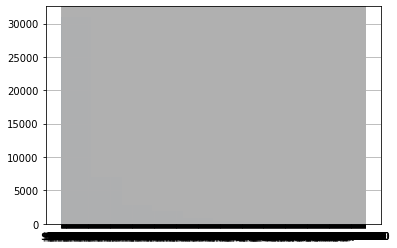

In [245]:
df1.price.hist()

In [266]:
df1.groupby('price')['location'].value_counts().nsmallest(20)

price  location                                    
10.0   beverly hills                                   1
       diamond bar                                     1
       fairfax,los angeles                             1
       hancock park,los angeles                        1
       hollywood,los angeles                           1
       lakewood                                        1
       long beach                                      1
       los feliz,los angeles                           1
       mount washington,los angeles                    1
       northeast antelope valley,lancaster             1
       northeast antelope valley,los angeles county    1
       pacific palisades,los angeles                   1
       santa monica,los angeles                        1
       sawtelle,los angeles                            1
       signal hill                                     1
       westlake,los angeles                            1
       woodland hills,ca            

In [252]:
df1.price.describe()

count       44599
unique        928
top       $100.00
freq         1395
Name: price, dtype: object

In [253]:
df1.price = df1.price.str.strip('$')
df1.price = df1.price.str.replace(',','')

In [255]:
df1.price = df1.price.astype('float64')

In [256]:
df1.price.describe()

count    44599.000000
mean       211.903249
std        579.067382
min          0.000000
25%         70.000000
50%        110.000000
75%        186.000000
max      25000.000000
Name: price, dtype: float64

In [262]:
df1.drop(df1[df1.price==0].index,axis=0,inplace=True)

In [265]:
df1.price.count()

44590

In [268]:
df1.to_csv('AffordabilityDataset.csv',index=False)

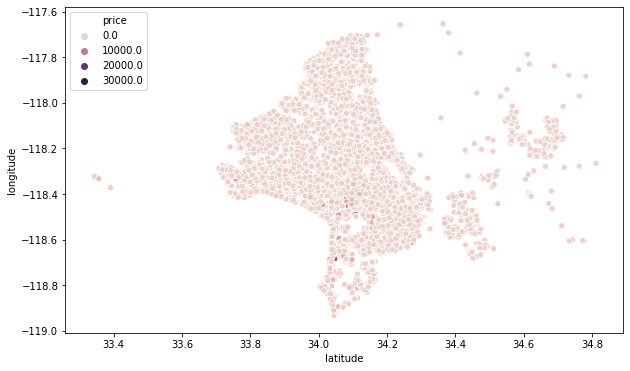

In [272]:
plt.figure(figsize=(10,6))
sns.scatterplot(df1.latitude,df1.longitude,hue=df1.price)
plt.ioff()

In [291]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

#df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_plot = df1[df1['state'] == 'CA']

values = df_plot['price'].tolist()
fips = '06'

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='AirBnB Locations according to their per day prices',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
py.iplot(fig, filename='choropleth_california')

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo
